Objective :
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Business and Data Understanding :
Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in. For the analysis, consider a country to be English speaking only if English is one of the official languages in that country

Business objective:
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'. (Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.)

In [242]:
#Importing the modules required for the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Checkpoint 1: Data Cleaning 1
#### Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [243]:
# Reading companies data set using pandas
companies = pd.read_csv(r"C:\Users\susha\Documents\Assignments\28_07_21\companies.csv")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [244]:
#checking shape of the companies dataframe
companies.shape

(66368, 10)

In [245]:
#Reading rounds2 data set using pandas
rounds2 = pd.read_csv(r"C:\Users\susha\Documents\Assignments\28_07_21\rounds2.csv")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [246]:
#How many unique companies are present in rounds2?

rounds2['company_permalink']= rounds2['company_permalink'].str.lower()
rounds2['company_permalink'].describe()

count                       114949
unique                       66373
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [247]:
# How many unique companies are present in companies?

companies['permalink'] = companies['permalink'].str.lower()
print(len(companies['permalink'].unique()))


66368


In [248]:
 #Are there any companies in the rounds2 file which are not present in companies? Answer Y/N

temp1 = pd.DataFrame(rounds2.company_permalink.unique())
temp2 = pd.DataFrame(companies.permalink.unique())
temp1.equals(temp2)

False

In [249]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.

master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
len(master_frame.index)

114949

# Cleaning The data


In [251]:
# checking the no.of null values in the coloumns of the master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                     40
name                          41
homepage_url                6170
category_list               3437
status                        40
country_code                8694
state_code                 10960
region                     10183
city                       10180
founded_at                 20542
dtype: int64

In [252]:
# inscpecting null values in percentage
round(master_frame.isnull().sum()*100/len(master_frame),2)


company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.03
name                        0.04
homepage_url                5.37
category_list               2.99
status                      0.03
country_code                7.56
state_code                  9.53
region                      8.86
city                        8.86
founded_at                 17.87
dtype: float64

In [253]:
#drop out the coloumns that has no significance in the analysis of the dataframe
master_frame=master_frame[['permalink','funding_round_type','raised_amount_usd','name','category_list','country_code']]

In [254]:
master_frame

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,convertible_note,41313.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
114945,/organization/zzzzapp-com,seed,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
114946,NaN,venture,NaN,NaN,NaN,NaN
114947,/organization/ôasys-2,seed,18192.0,Ôasys,Consumer Electronics|Internet of Things|Teleco...,USA


In [255]:
#checking the Null values percentage again after deletion column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink              0.03
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.04
category_list          2.99
country_code           7.56
dtype: float64


In [256]:
#Dropping rows based on null columns
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull() | master_frame['name'].isnull())]

In [257]:
# dropping values with 0 investment as it would affect our average calulations as no investment would be of 0 value
master_frame.drop(master_frame[master_frame['raised_amount_usd'] == 0].index, inplace = True)

In [258]:
master_frame.shape

(88153, 6)

# Checkpoint 2: Funding Type Analysis

In [259]:
#Observing the unique funding_round_type
master_frame.funding_round_type.value_counts()

venture                  47786
seed                     21018
debt_financing            6484
angel                     4373
grant                     1934
private_equity            1819
undisclosed               1330
convertible_note          1295
equity_crowdfunding        953
post_ipo_equity            598
product_crowdfunding       327
post_ipo_debt              151
non_equity_assistance       57
secondary_market            28
Name: funding_round_type, dtype: int64

In [260]:
# calculation of the total raised amount of all the funding_round_type
master_frame.groupby(['funding_round_type']).sum().sort_values(by = 'raised_amount_usd',ascending=False)

,raised_amount_usd
funding_round_type,
venture,5.605234e+11
private_equity,1.345680e+11
debt_financing,1.116928e+11
post_ipo_equity,3.951408e+10
post_ipo_debt,2.558722e+10
undisclosed,2.137148e+10
seed,1.577353e+10
grant,8.749993e+09
angel,4.274925e+09


In [261]:
#Retaining the rows with only four investment types as we need only these for our analysis
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [262]:
#calculating average investment amount for each of the four funding types.
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel               977572.63
private_equity    73979134.15
seed                750477.05
venture           11729865.71
Name: raised_amount_usd, dtype: float64

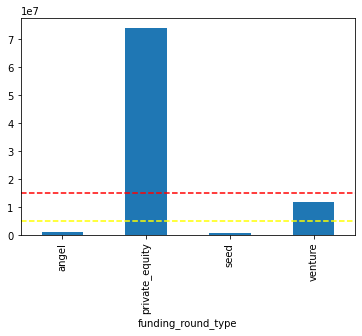

In [263]:
#creating bar plot for the investment and checking the range of the the investment ie. 5 million to 15 million USD
master_frame.groupby('funding_round_type').raised_amount_usd.mean().plot.bar()
plt.axhline(y = 5000000, color ="yellow", linestyle ="--")
plt.axhline(y = 15000000, color ="red", linestyle ="--")
plt.show()

In [264]:
#Retaining rows with only venture type. As Spark Funds wants to invest between 5 to 15 million USD per investment round
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

# Checkpoint 3: Country Analysis

In [265]:
#Sparks wants to find out the top 9 countries where it can invest.
top9=master_frame.groupby(['country_code']).sum().sort_values(by = 'raised_amount_usd',ascending=False).head(9)
top9

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


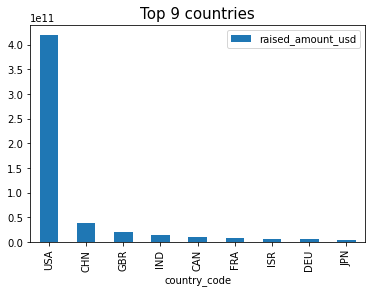

In [332]:
#visualize the dataframe in a bar plot
top9.groupby(['country_code']).sum().sort_values(by = 'raised_amount_usd',ascending=False).head(9).plot.bar()
plt.title("Top 9 countries",size=15)
plt.show()


Top English speaking countries to invest in (with highest funding for chosen type)

In [267]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

In [269]:
#Extracting the primary_sector value
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0].lower())

In [270]:
master_frame.head(10)

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,media
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA,analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA,analytics
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,USA,analytics
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,USA,apps
28,/organization/10-minutes-with,venture,4000000.0,10 Minutes With,Education,GBR,education
34,/organization/1000memories,venture,2520000.0,1000memories,Curated Web,USA,curated web
38,/organization/1000museums-com,venture,265940.0,1000museums.com,Curated Web,USA,curated web
39,/organization/1000museums-com,venture,2906832.0,1000museums.com,Curated Web,USA,curated web
41,/organization/1000museums-com,venture,1500000.0,1000museums.com,Curated Web,USA,curated web


# Checkpoint 4: Sector Analysis 1

In [271]:
#importing mapping csv
mapping = pd.read_csv(r"C:\Users\susha\Documents\Assignments\28_07_21\mapping.csv")
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [272]:
#Removing the null values in the mapping data frame
mapping=mapping[~mapping.category_list.isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


# Cleaning the mapping dataframe

In [273]:
#checking the mapping dataframe null values
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [274]:
#converting category_list to lower case
mapping.category_list=mapping.category_list.apply(lambda x: str(x).lower())

In [275]:
mapping.category_list

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

In [276]:
#checking whether primary_sector of master_dataframe is present in category_list of mapping dataframe
mapping[~mapping['category_list'].isin(master_frame['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


In [277]:
#We found that there is 0 in name of category_list values so it must be treated for correct spelling
mapping.category_list=mapping.category_list.apply(lambda x:x.replace('0','na'))

In [278]:
master_frame[~master_frame['primary_sector'].isin(mapping['category_list'])]


,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
20328,/organization/clean-vehicle-solutions,venture,125000.0,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,USA,natural gas uses
22940,/organization/consensus-point,venture,788374.0,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,USA,enterprise 2.0
22942,/organization/consensus-point,venture,2600000.0,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,USA,enterprise 2.0
28541,/organization/dolores-speech-products,venture,250000.0,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,USA,adaptive equipment
35278,/organization/fia-formula-e,venture,68569234.0,FIA Formula E,Racing,GBR,racing
36012,/organization/five-below,venture,194000000.0,Five Below,Specialty Retail,USA,specialty retail
36291,/organization/flexport,venture,20000000.0,Flexport,Enterprise 2.0|Enterprise Software|Insurance|L...,USA,enterprise 2.0
43506,/organization/healthtell,venture,9486929.0,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,USA,biotechnology and semiconductor
51816,/organization/justinmind,venture,862000.0,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,USA,rapidly expanding
70078,/organization/omega-point-research,venture,3172815.0,Omega Point Research,Product Search,USA,product search


In [280]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars='category_list')


In [281]:
mapping

,category_list,variable,value
0,3d,Automotive & Sports,0
1,3d printing,Automotive & Sports,0
2,3d technology,Automotive & Sports,0
3,accounting,Automotive & Sports,0
4,active lifestyle,Automotive & Sports,0
...,...,...,...
6178,wholesale,"Social, Finance, Analytics, Advertising",0
6179,wine and spirits,"Social, Finance, Analytics, Advertising",0
6180,wireless,"Social, Finance, Analytics, Advertising",0
6181,women,"Social, Finance, Analytics, Advertising",0


In [282]:
# filtering out relevant rows
mapping = mapping[mapping['value'] ==1]


In [284]:
#renaming columns
mapping.rename(columns={'variable':'main_sector'}, inplace = True)

#dropping additional column
mapping.drop('value', axis = 1, inplace = True)

mapping


,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports
...,...,...
6112,social recruiting,"Social, Finance, Analytics, Advertising"
6113,social television,"Social, Finance, Analytics, Advertising"
6114,social travel,"Social, Finance, Analytics, Advertising"
6125,stock exchanges,"Social, Finance, Analytics, Advertising"


In [285]:
#removing category_list from master_data frame because we have same coloum name in mapping data frame
master_frame=master_frame.drop('category_list',axis=1)

# merging maping and master_frame using left join to retain all records of master_frame
master_frame=pd.merge(master_frame,mapping,how='left',left_on='primary_sector',right_on='category_list')

In [286]:
master_frame

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,category_list,main_sector
0,/organization/-fame,venture,10000000.0,#fame,IND,media,media,Entertainment
1,/organization/0xdata,venture,20000000.0,H2O.ai,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1700000.0,H2O.ai,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8900000.0,H2O.ai,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5000000.0,1 Mainstream,USA,apps,apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...
38780,/organization/zyomyx-inc,venture,12000000.0,ZYOMYX,USA,biotechnology,biotechnology,Cleantech / Semiconductors
38781,/organization/zyomyx-inc,venture,14219999.0,ZYOMYX,USA,biotechnology,biotechnology,Cleantech / Semiconductors
38782,/organization/zyomyx-inc,venture,555016.0,ZYOMYX,USA,biotechnology,biotechnology,Cleantech / Semiconductors
38783,/organization/zyrra,venture,140500.0,Zyrra,USA,e-commerce,e-commerce,Others


In [288]:
#inspecting main sector with null values
master_frame.isnull().sum()


permalink              0
funding_round_type     0
raised_amount_usd      0
name                   0
country_code           0
primary_sector         0
main_sector           15
dtype: int64

In [290]:
#Retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)


38770

In [292]:
#Since, Sparks wants to spend only between 5 and 15 million USD so the master_frame must be sorted according to that
master_frame=master_frame[(master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)]

### Country-Wise Sector Analysis
Creating the three country-wise data frame filtered by venture type funding

In [293]:
#Dataframe for top country
D1=master_frame[master_frame.country_code=='USA']
D1.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector
3,/organization/0xdata,venture,8900000.0,H2O.ai,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5000000.0,1 Mainstream,USA,apps,"News, Search and Messaging"
17,/organization/128-technology,venture,11999347.0,128 Technology,USA,service providers,Others
20,/organization/1366-technologies,venture,15000000.0,1366 Technologies,USA,manufacturing,Manufacturing
21,/organization/1366-technologies,venture,5000000.0,1366 Technologies,USA,manufacturing,Manufacturing


In [294]:
#creating d1 sector_analysis
d1_sector_analysis = D1.groupby('main_sector')['raised_amount_usd'].agg(('sum', 'count'))

In [295]:
# renaming columns
d1_sector_analysis.rename(columns={'sum':'Sum of investment', 'count': 'Count of Investment'}, inplace = True)

In [296]:
#merging count and investment amount
D1 = pd.merge(D1, d1_sector_analysis, on = 'main_sector')

In [297]:
D1

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector,Sum of investment,Count of Investment
0,/organization/0xdata,venture,8900000.0,H2O.ai,USA,analytics,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
1,/organization/21e6,venture,5050000.0,21 Inc,USA,big data,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
2,/organization/33across,venture,13100000.0,33Across,USA,advertising,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
3,/organization/33across,venture,9000000.0,33Across,USA,advertising,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
4,/organization/360commerce,venture,12000000.0,360Commerce,USA,information technology,"Social, Finance, Analytics, Advertising",2.380738e+10,2714
...,...,...,...,...,...,...,...,...,...
12058,/organization/zyga-technology,venture,10000000.0,Zyga Technology,USA,health care,Health,8.211859e+09,909
12059,/organization/zyga-technology,venture,5000000.0,Zyga Technology,USA,health care,Health,8.211859e+09,909
12060,/organization/zyga-technology,venture,5750000.0,Zyga Technology,USA,health care,Health,8.211859e+09,909
12061,/organization/zyga-technology,venture,5000000.0,Zyga Technology,USA,health care,Health,8.211859e+09,909


In [328]:
#Dataframe for second most funded country
D2=master_frame[master_frame.country_code=='GBR']
#creating d2 sector_analysis
d2_sector_analysis = D2.groupby('main_sector')['raised_amount_usd'].agg(('sum', 'count'))
# remaing columns
d2_sector_analysis.rename(columns={'sum':'Sum of investment', 'count': 'Count of Investment'}, inplace = True)
#merging count and investment amount
D2 = pd.merge(D2, d2_sector_analysis, on = 'main_sector')
D2

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector,Sum of investment,Count of Investment
0,/organization/365scores,venture,5500000.0,365Scores,GBR,android,"Social, Finance, Analytics, Advertising",1.089404e+09,133
1,/organization/acal-enterprise-solutions,venture,10720178.0,Acal Enterprise Solutions,GBR,information technology,"Social, Finance, Analytics, Advertising",1.089404e+09,133
2,/organization/adbrain,venture,7500000.0,Adbrain,GBR,advertising,"Social, Finance, Analytics, Advertising",1.089404e+09,133
3,/organization/adinsight,venture,6772812.0,ResponseTap,GBR,advertising,"Social, Finance, Analytics, Advertising",1.089404e+09,133
4,/organization/adjug,venture,6500000.0,Adjug,GBR,advertising,"Social, Finance, Analytics, Advertising",1.089404e+09,133
...,...,...,...,...,...,...,...,...,...
616,/organization/light-blue-optics,venture,13000000.0,Light Blue Optics,GBR,automotive,Automotive & Sports,1.670516e+08,16
617,/organization/made-com,venture,9278918.0,made.com,GBR,design,Automotive & Sports,1.670516e+08,16
618,/organization/prodrive,venture,9345794.0,Prodrive,GBR,automotive,Automotive & Sports,1.670516e+08,16
619,/organization/streetcar,venture,12430126.0,Streetcar,GBR,automotive,Automotive & Sports,1.670516e+08,16


In [299]:
#Dataframe for third most funded country
D3=master_frame[master_frame.country_code=='IND']
#creating d1 sector_analysis
d3_sector_analysis = D3.groupby('main_sector')['raised_amount_usd'].agg(('sum', 'count'))
# remaing columns
d3_sector_analysis.rename(columns={'sum':'Sum of investment', 'count': 'Count of Investment'}, inplace = True)
#merging count and investment amount
D3 = pd.merge(D3, d3_sector_analysis, on = 'main_sector')
D3

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector,Sum of investment,Count of Investment
0,/organization/-fame,venture,10000000.0,#fame,IND,media,Entertainment,280830000.0,33
1,/organization/adlabs-imagica,venture,8180000.0,Adlabs Imagica,IND,entertainment,Entertainment,280830000.0,33
2,/organization/apalya,venture,7500000.0,Apalya,IND,content,Entertainment,280830000.0,33
3,/organization/apalya,venture,8000000.0,Apalya,IND,content,Entertainment,280830000.0,33
4,/organization/chef-s-basket,venture,6000000.0,Chef's Basket,IND,restaurants,Entertainment,280830000.0,33
...,...,...,...,...,...,...,...,...,...
323,/organization/mydentist,venture,10000000.0,MyDentist,IND,health care,Health,167740000.0,19
324,/organization/nephroplus,venture,10000000.0,NephroPlus,IND,health and wellness,Health,167740000.0,19
325,/organization/portea-medical,venture,9000000.0,Portea Medical,IND,health care,Health,167740000.0,19
326,/organization/satnav-technologies,venture,7000000.0,SatNav Technologies,IND,public transportation,Health,167740000.0,19


In [300]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12063
621
328


In [301]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107757097294.0
5379078691.0
2949543602.0


In [354]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
d1_sector_analysis.sort_values(by='Count of Investment',ascending=False)

,Sum of investment,Count of Investment
main_sector,,
Others,2.632101e+10,2950
"Social, Finance, Analytics, Advertising",2.380738e+10,2714
Cleantech / Semiconductors,2.163343e+10,2350
"News, Search and Messaging",1.397157e+10,1583
Health,8.211859e+09,909
Manufacturing,7.258553e+09,799
Entertainment,5.099198e+09,591
Automotive & Sports,1.454104e+09,167


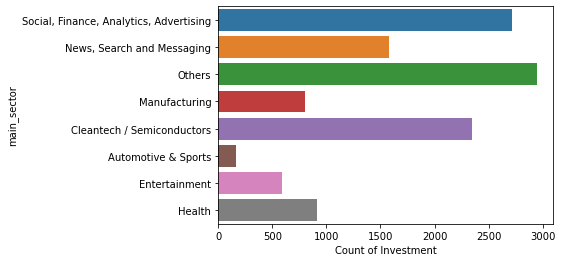

In [341]:
## barplot for USA with all main_sector of investment
sns.barplot(y=D1.main_sector,x=D1['Count of Investment'])
plt.show()

In [303]:
#Top sector
D1[D1['main_sector']=='Others'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
Virtustream            64300000.0
Capella Photonics      54968051.0
AirTight Networks      54201907.0
deCarta                52100000.0
Black Duck Software    51000000.0
Name: raised_amount_usd, dtype: float64

In [329]:
#Second top sector
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(5)

In [356]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
d2_sector_analysis.sort_values(by='Count of Investment',ascending=False)

,Sum of investment,Count of Investment
main_sector,,
Others,1.283624e+09,147
"Social, Finance, Analytics, Advertising",1.089404e+09,133
Cleantech / Semiconductors,1.163990e+09,130
"News, Search and Messaging",6.157462e+08,73
Entertainment,4.827847e+08,56
Manufacturing,3.619403e+08,42
Health,2.145375e+08,24
Automotive & Sports,1.670516e+08,16


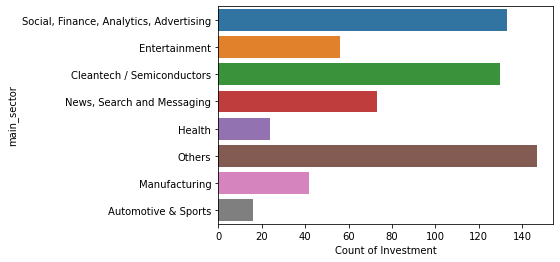

In [353]:
# barplot for GBR with all main_sector of investment
sns.barplot(y=D2.main_sector,x=D2['Count of Investment'])
plt.show()

In [308]:
#top sector
D2[D2['main_sector']=='Others'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
Electric Cloud             37000000.0
SenSage                    36250000.0
Enigmatec                  32500000.0
SilverRail Technologies    29000000.0
OpenCloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [357]:
#Second top sector
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
VisualDNA                28550000.0
MarketInvoice            25553007.0
Name: raised_amount_usd, dtype: float64

In [358]:
#Top sector, second-top, third-top for D3 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
d3_sector_analysis.sort_values(by='Count of Investment',ascending=False)

,Sum of investment,Count of Investment
main_sector,,
Others,1.013410e+09,110
"Social, Finance, Analytics, Advertising",5.505496e+08,60
"News, Search and Messaging",4.338345e+08,52
Entertainment,2.808300e+08,33
Manufacturing,2.009000e+08,21
Cleantech / Semiconductors,1.653800e+08,20
Health,1.677400e+08,19
Automotive & Sports,1.369000e+08,13


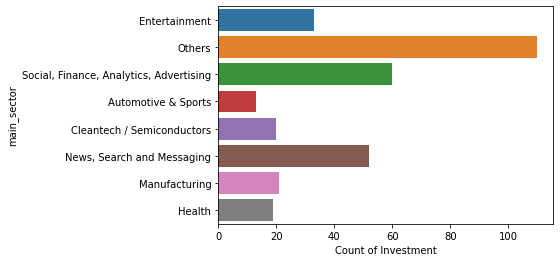

In [359]:
## barplot for IND with all main_sector of investment
sns.barplot(y=D3.main_sector,x=D3['Count of Investment'])
plt.show()

In [325]:
#top sector
D3[D3['main_sector']=='Others'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
FirstCry.com         39000000.0
Myntra               38000000.0
CommonFloor          32900000.0
Pepperfry.com        28000000.0
ItzCash Card Ltd.    25000000.0
Name: raised_amount_usd, dtype: float64

In [326]:
#Second top sector
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(5)

name
Manthan Systems               50700000.0
Komli Media                   28000000.0
ShopClues.com                 25000000.0
inTarvo                       21900000.0
Grameen Financial Services    21556050.0
Name: raised_amount_usd, dtype: float64

In [360]:
top3_mapping_range_sector=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])].append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]).append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])])

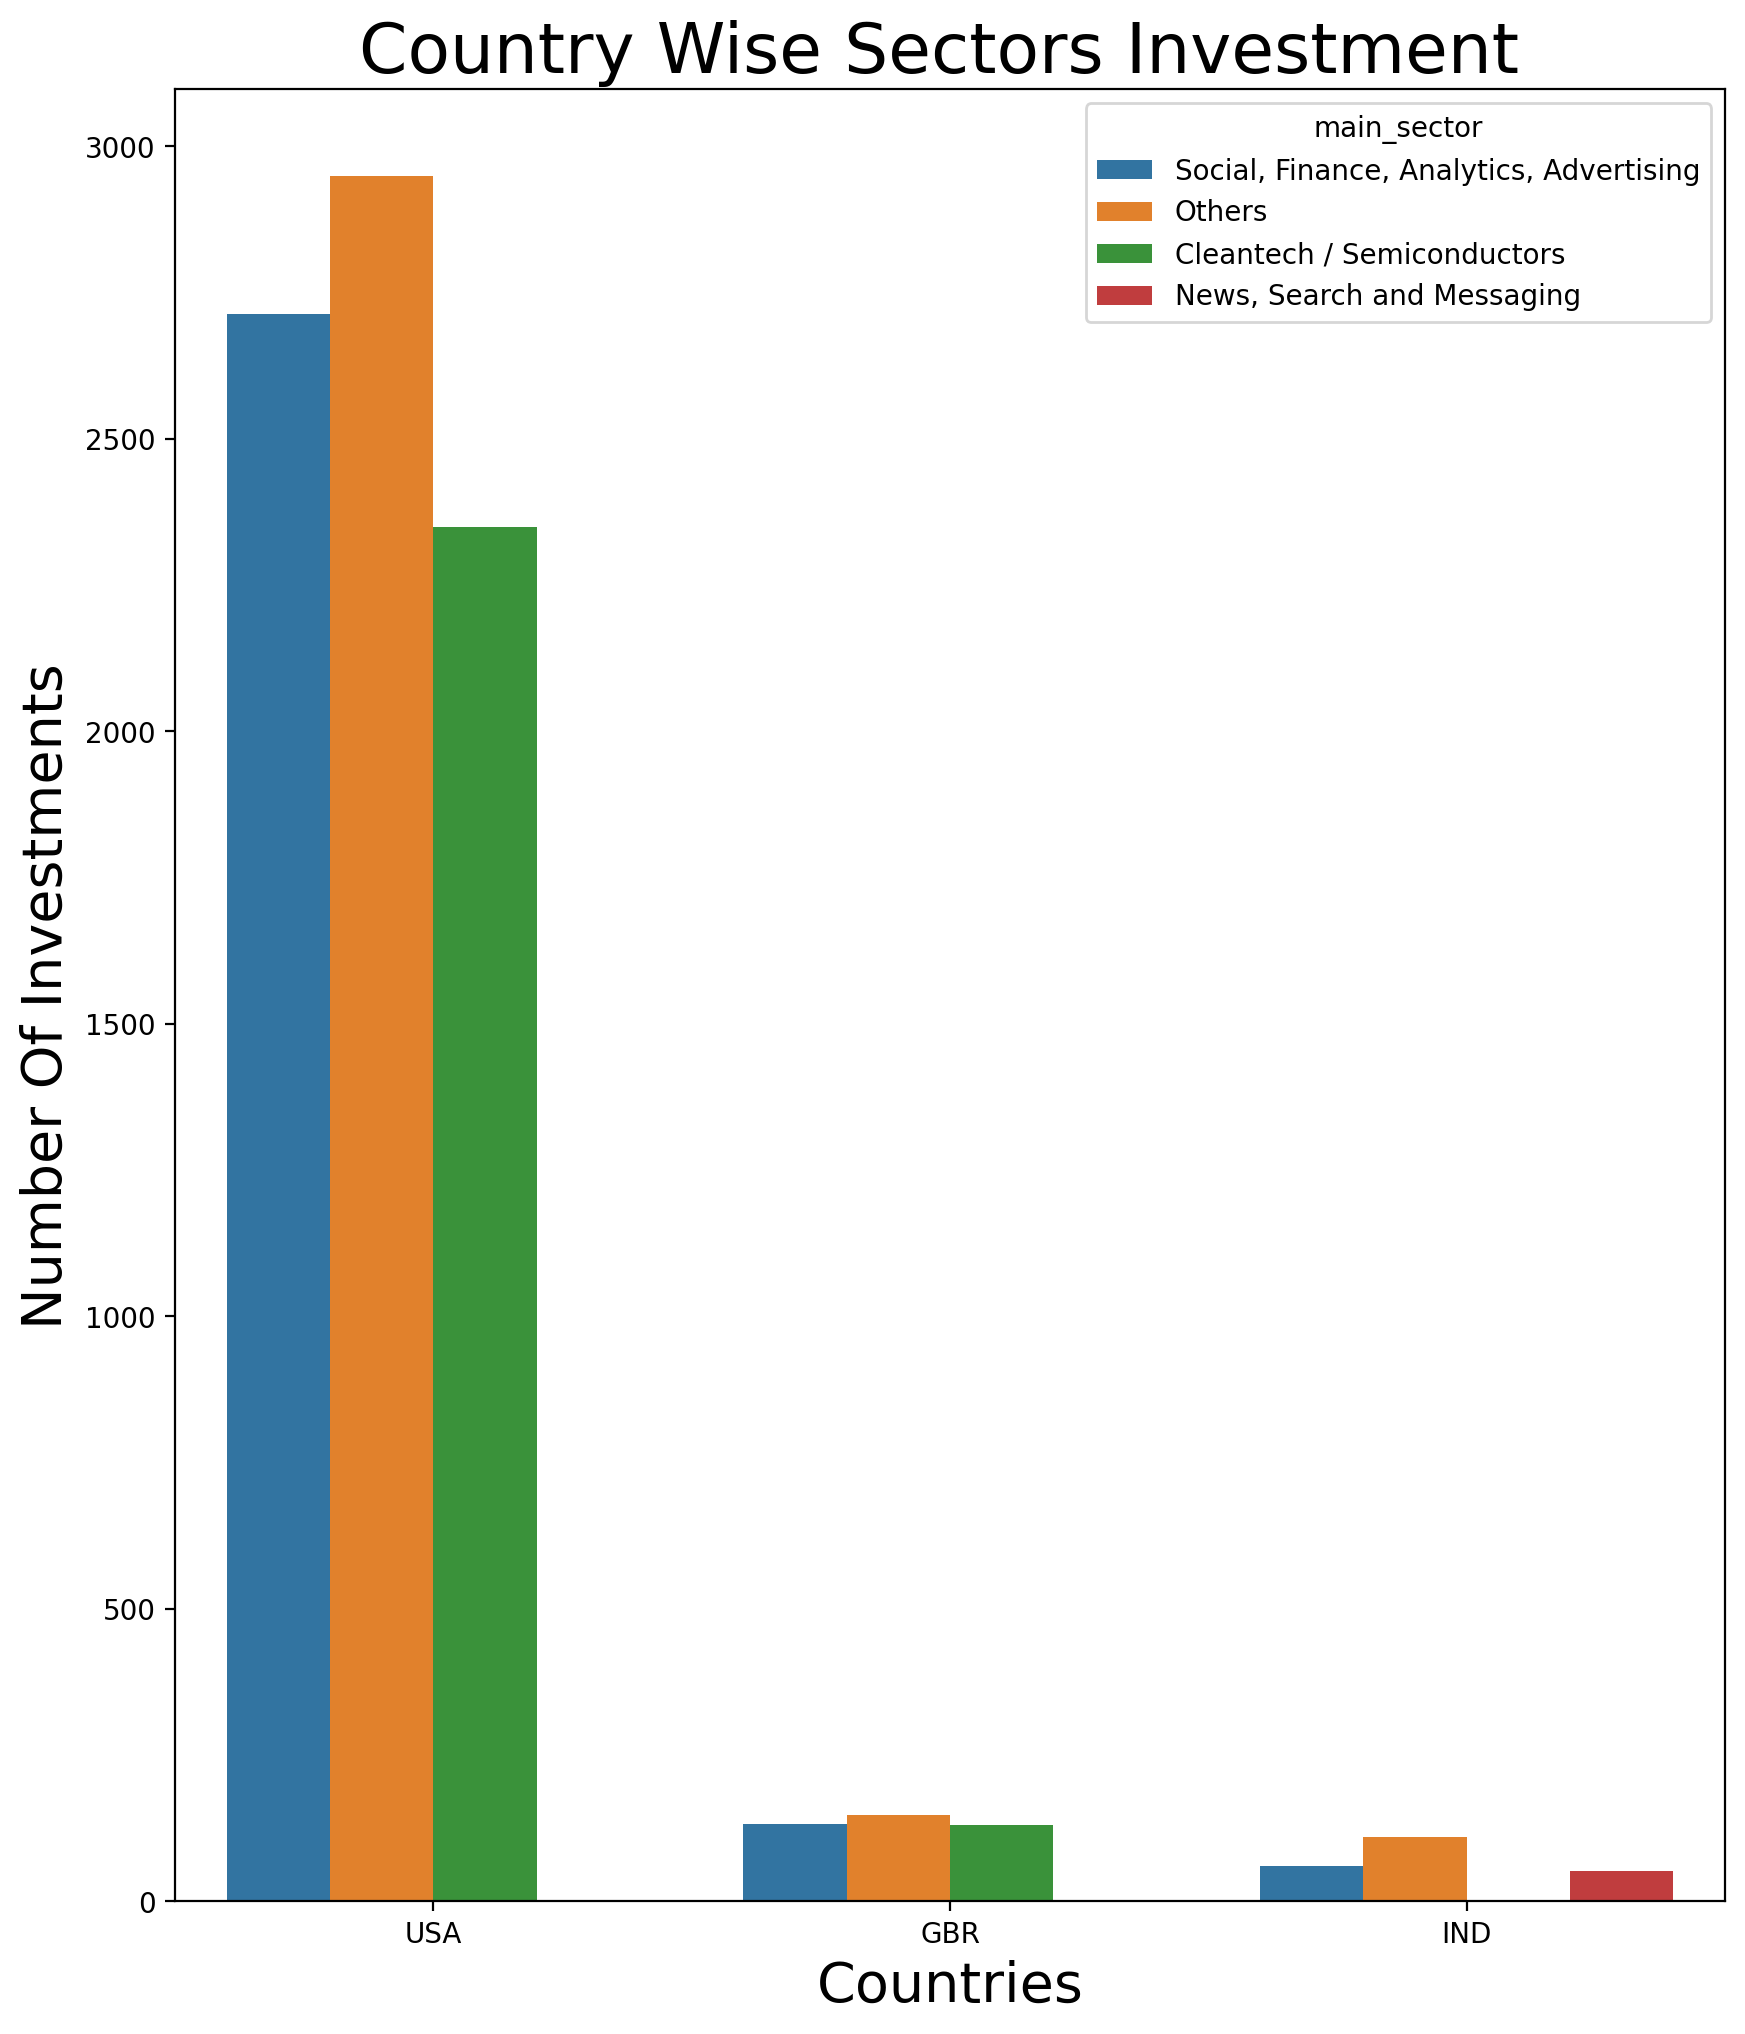

In [365]:
plt.figure(figsize=(10,12),dpi=200)
sns.barplot(x='country_code',y='raised_amount_usd',hue='main_sector',data=top3_mapping_range_sector,estimator=lambda x:len(x))
plt.xlabel('Countries',size=20)
plt.ylabel('Number Of Investments',size=20)
plt.title('Country Wise Sectors Investment ',size=25)
plt.show()